In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
ds=pd.read_csv('train.csv')

In [8]:
ds.shape

(42000, 785)

In [9]:
ds.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [16]:
ds.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 1st column is label 
data=ds.values


In [24]:
X=data[:,1:]
Y=data[:,0]

In [27]:
X.shape, Y.shape

((42000, 784), (42000,))

In [29]:
from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,random_state=2)

In [37]:
# visualize some samples
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

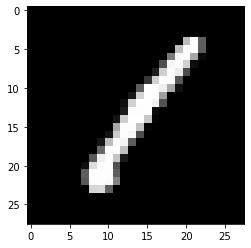

1


In [38]:
drawImg(X[0])
print(Y[0])

### knn

In [40]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,query_point,k=5):
    vals=[]
    m=x.shape[0]  # totak number of points
    for i in range(m):
        d=distance(query_point,x[i])
        vals.append((d,y[i])) # append distancce and label of point
        # d in first place because we have to sort list according to distance
    vals=sorted(vals)
    
    vals=vals[:k]    # k nearrest points
    vals=np.array(vals) 
    
    newlist=np.unique(vals[:,1],return_counts=True) 
    print(newlist)
    index=newlist[1].argmax()
    prediction=newlist[0][index]
    return prediction

In [46]:
pred=knn(X_train,y_train,X_test[5])
print(int(pred))

(array([2.]), array([5]))
2


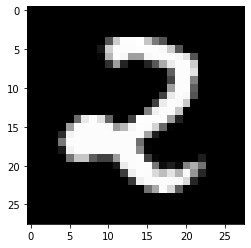

2


In [47]:
drawImg(X_test[5])
print(y_test[5])